# CZ1015 - MINI PROJECT : EARTHQUAKE 

## Lab Group - FS4

## Team 8  (FS4T08)
Amadeus Koh 

Noah Seah

Lim Qi Wei

Sankeerthana Satini


## Approach

Our Approach to solving this problem includes coming up with a Problem for us to work on, and then doing repetitive Exploratory Analysis of the Dataset in order to understand the nature, context and the statistical value of each variable before Data Preparation. 

Along this process, any interesting pattern was taken into account, outliers were removed, and classes were balanced to prepare the Data before further Exploration and Modelling. 

To solve our Proposed Problem - which is a Classification problem, we chose to implement Random Forest and Neural Networks to predict the level of damage done to the building and find the Top 3 Variables that strongly affect the prediction of the damage level.

## Background

Needless to say, the twin Earthquakes that hit Nepal on 25th April and 12th May 2015, had caused unexplainable destruction to the lives of the people and the infrastructure of many cities including Nepal's capital city - Kathmandu.

It is in times like these that the Government should better allocate its fiscal budget in order to support the survivors and rebuild the destroyed infrastructure. However, according to recent official reports only 16 percent of the more than US$4 billion donated has been utilized.

From this we can infer that the Fiscal Budget can be better allocated and utilised by setting aside a portion of the budget for Reconstruction due to Natural Disasters. Therefore, in order to prevent such a situation again, the Government should plan its budget ahead and consider the unforeseen circumstances.

 > Ref: <https://www.hrw.org/news/2018/04/25/lessons-nepal-three-years-after-deadly-earthquake>

## Interesting Problem

As a part of the process of allocating the Annual Government Budget of Nepal, assuming a limited budget has been kept aside for the purpose of reconstruction after the event of an Earthquake:

1. What are the 3 most important features in predicting the possible level of damage done to the building, in an event of another earthquake? 
2. How then, do we allocate the Government's Budget to reinforce the infrastructure of the existing houses, in order to mitigate the level of the destruction when another earthquake happens based on their predicted level of destruction.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()

## Exploratory Data Analysis 

##### Obtaining Dataset

In [4]:
y = pd.read_csv("train_labels.csv")
X = pd.read_csv("train_values.csv")

In [5]:
X.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


##### Obtaining Information and Statistical Summary

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [8]:
X.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Viewing all the Variables in the Dataset
X.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

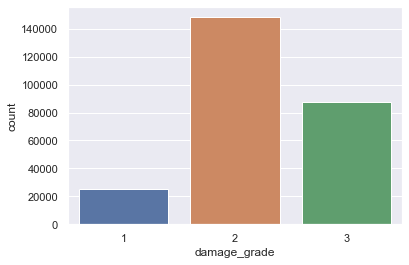

In [10]:
#visualising the classes of damage_grade
sns.countplot(x='damage_grade', data=y)

From this count plot, we can observe that our labels are highly imbalanced, with a large number of damage_grade 2 and very little damage_grade 1. Thus we should find a way to balance these unbalanced classes. Otherwise this can lead to an error in the classification accuracy later on as the model gets used to predicting the class with the highest count.

## Data Preparation and Further Exploratory Analysis

In [11]:
#Dropping the variable building_id - as building_id are used for identification of the buildings and does not serve a 
#statistical purpose
df = pd.concat([X, y.drop("building_id", axis=1)], axis=1)

In [12]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


##### Exploring the correlation of each variable with damage_grade

In [13]:
df.corr()['damage_grade'].sort_values()

has_superstructure_cement_mortar_brick   -0.254131
has_superstructure_rc_engineered         -0.179014
has_superstructure_rc_non_engineered     -0.158145
area_percentage                          -0.125221
has_secondary_use_hotel                  -0.097942
has_secondary_use_rental                 -0.083754
has_secondary_use                        -0.079630
geo_level_1_id                           -0.072347
has_superstructure_timber                -0.069852
has_superstructure_bamboo                -0.063051
has_superstructure_cement_mortar_stone   -0.060295
has_superstructure_other                 -0.030224
has_secondary_use_institution            -0.028728
has_secondary_use_other                  -0.016334
has_secondary_use_school                 -0.011692
has_secondary_use_industry               -0.011024
has_secondary_use_gov_office             -0.009378
has_secondary_use_health_post            -0.008543
has_secondary_use_use_police             -0.001656
building_id                    

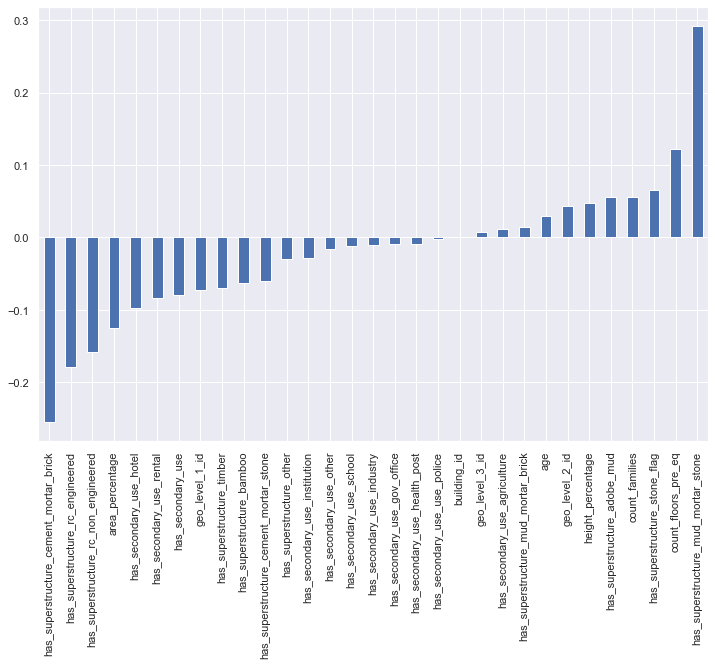

In [14]:
#visualising the above correlation coefficients in a graph
plt.figure(figsize=(12,8))
df.corr()['damage_grade'].sort_values().drop('damage_grade').plot(kind='bar')

Based on the above graph, it can be observed that has_superstructure_cement_mortar_brick has the strongest negative correlation with the damage grade and has_superstructure_mud_mortar_stone has the strongest positive correlation with the damage grade.

##### Visualising the correlation using heatmaps

In [15]:
#Extracting the numerical variables only
num_data = df.select_dtypes(include=["int64"])

set_a = num_data.iloc[:,[1,2,3,4,31]]
set_b = num_data.iloc[:,[5,6,7,19,31]]

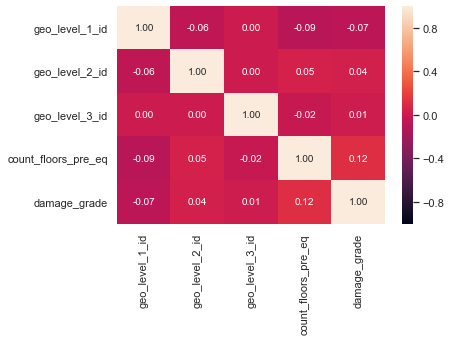

In [16]:
sns.heatmap(data=set_a.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

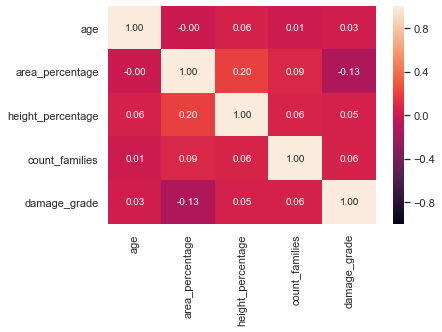

In [17]:
sns.heatmap(data=set_b.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

#### Further Analysis of Each Set of Variables

Now, we will look at the <strong>geo_level_id</strong> columns, which contains the geographic region in which the building exists, from largest (level 1) to most specific sub-region (level 3). 

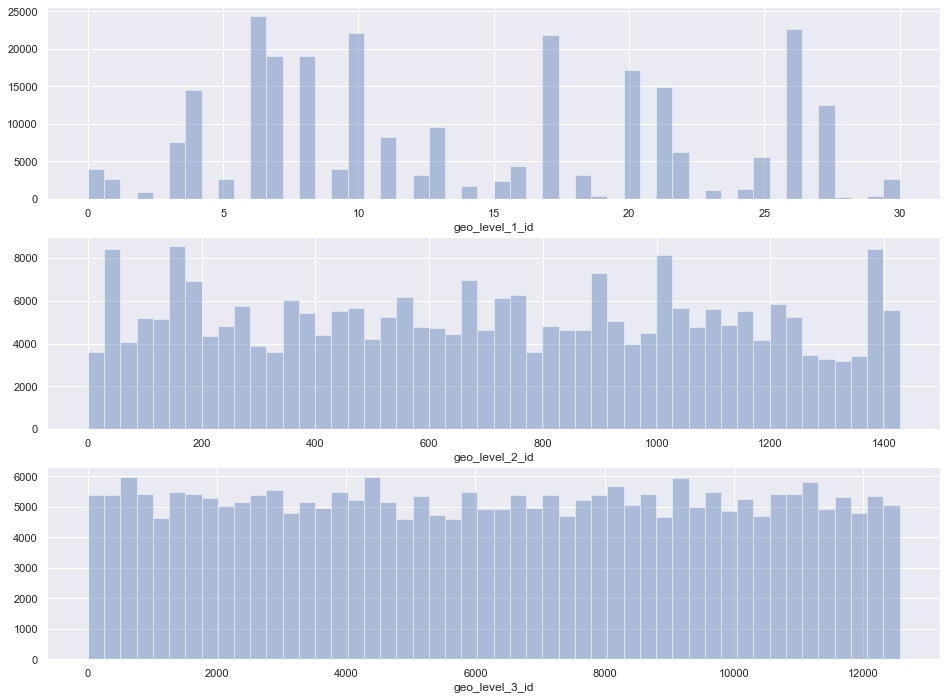

In [18]:
#creating a new list containing only the geo_level_id columns and visualising them
geo_level = ["geo_level_1_id", "geo_level_2_id", "geo_level_3_id"]
f, axes = plt.subplots(3, 1, figsize=(16,12))

for i in range(3):
    sns.distplot(df[geo_level[i]], ax=axes[i], kde=False)

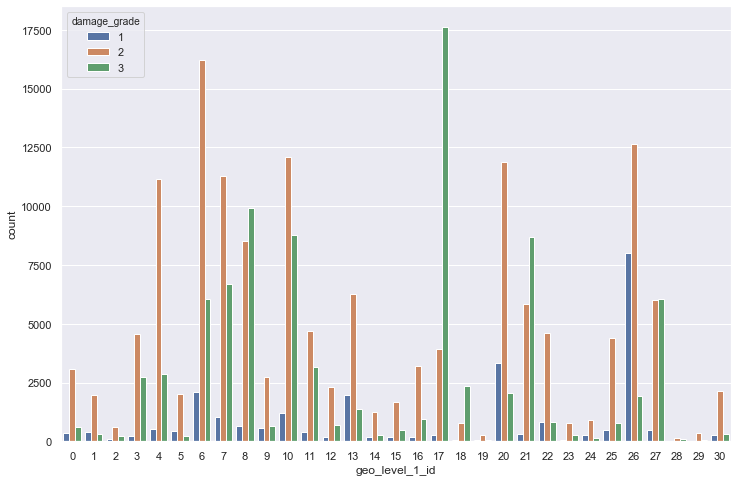

In [19]:
#Visualising the damage_grade and geo_level_ids using a countplot
plt.figure(figsize=(12, 8))
sns.countplot(x="geo_level_1_id", data=df, hue='damage_grade')

Even though the geo_level_1_id is a numerical variable, its numerical value has little meaning as each number is likely to refer to a region in Nepal, with no specific meaning to the order. From this countplot, we do not see any relationship between damage grades and the numerical value of geo_level_1_id.

Now, we look at <strong>count_floors_pre_eq</strong>: the number of floors in the building before the earthquake.

In [20]:
X["count_floors_pre_eq"].value_counts()

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
9         1
8         1
Name: count_floors_pre_eq, dtype: int64

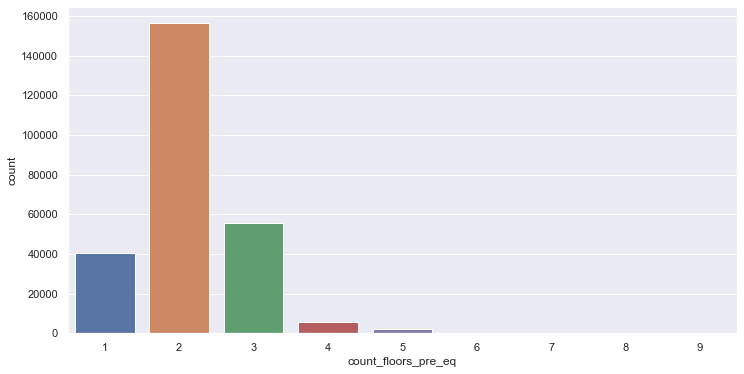

In [21]:
#Visualizing the no of floors 
plt.figure(figsize= (12,6))
sns.countplot(X["count_floors_pre_eq"])

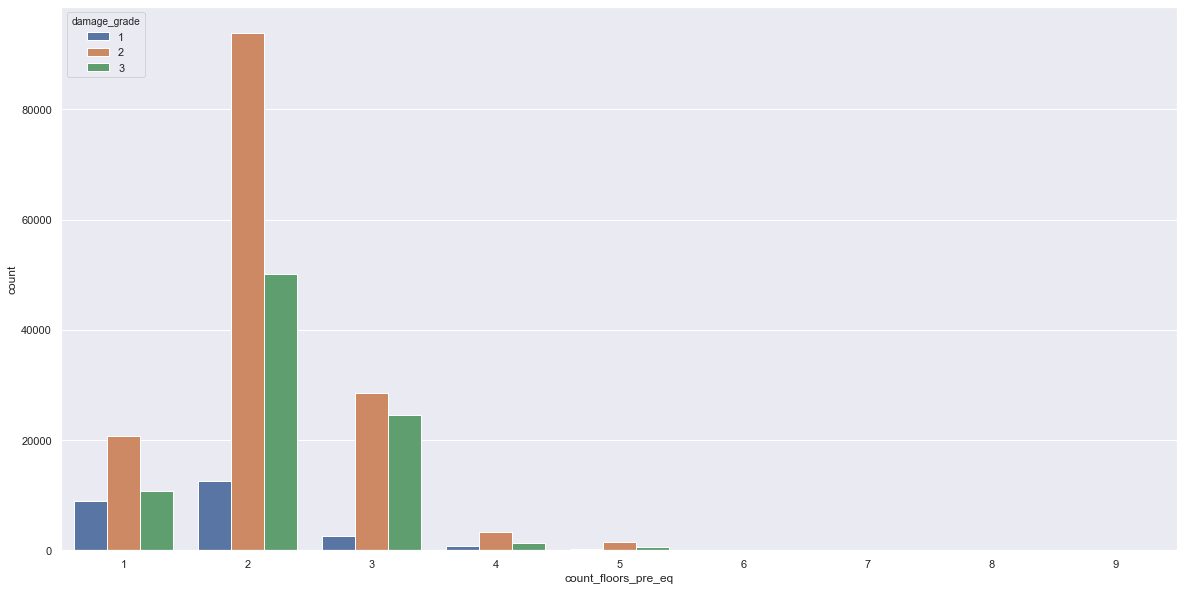

In [22]:
#Visualising the no of floors and the damage_grade using a countplot
plt.figure(figsize=(20,10))
sns.countplot(x='count_floors_pre_eq', hue='damage_grade', data=df)
#only the buildings with no of floors less than or equals to 5 is shown here 

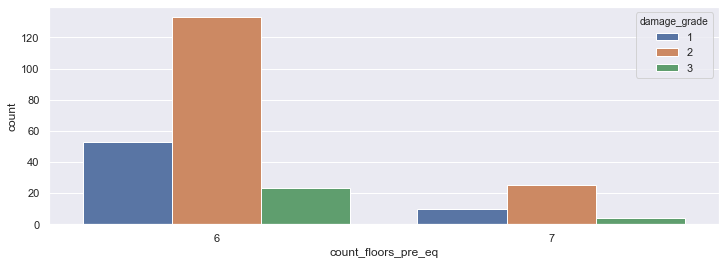

In [23]:
#Buildings with no of floors that are greater than or equals to 6 are shown here
six_floors_and_above = df[(df['count_floors_pre_eq']==6) | (df['count_floors_pre_eq']==7)]

plt.figure(figsize=(12,4))
sns.countplot(x='count_floors_pre_eq', data=six_floors_and_above, hue='damage_grade')

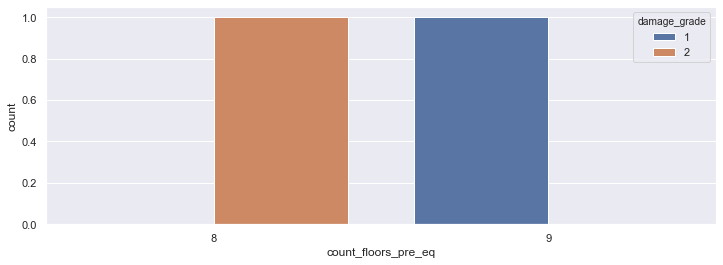

In [24]:
#Buildings with no of floors that are greater than or equals to 8 are shown here
eight_floors_and_above = df[(df['count_floors_pre_eq']==8) | (df['count_floors_pre_eq']==9)]
plt.figure(figsize=(12,4))
sns.countplot(x='count_floors_pre_eq', data=eight_floors_and_above, hue='damage_grade')

Looking at the <strong>age</strong> variable: age of the building in years.

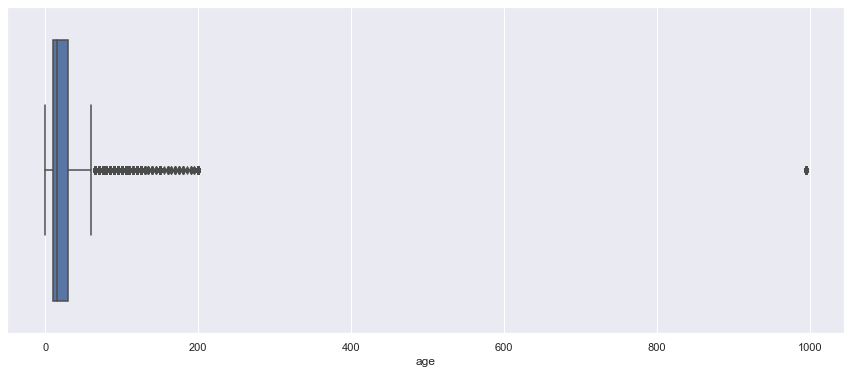

In [25]:
# Plotting the boxplot of the variable age in order to better understand the distribution and see the outliers
plt.figure(figsize=(15,6))
sns.boxplot(X["age"])

In [26]:
#Finding the statistical summary of the age in order to better understand the context and logic behind the outliers
pd.DataFrame(df["age"]).describe()

,age
count,260601.000000
mean,26.535029
std,73.565937
min,0.000000
25%,10.000000
50%,15.000000
75%,30.000000
max,995.000000


From this boxplot we can observe that there is a very significant outlier in building age, with several points lying around 1000 years old whereas majority of the our data lies between the 10 to 30 years range.

Removing the outliers in terms of <strong>age</strong>, in order to <strong>prepare the data</strong> for training.

In [27]:
df['age'].value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
140        9
130        9
180        7
160        6
170        6
175        5
135        5
145        3
190        3
195        2
165        2
155        1
185        1
Name: age, dtype: int64

In [28]:
#Removing the outliers in the variable age
df = df.drop(X[X["age"]==995].index) 
#others in the range of 70-150 have been left intact due to the probability of being ancestral properties

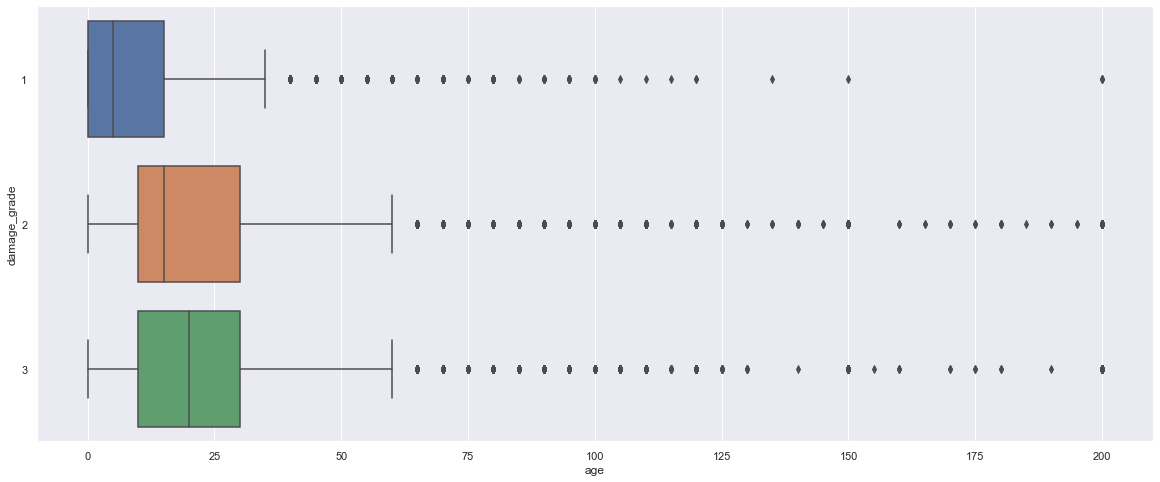

In [29]:
#Plotting a boxplot to observe the relationship between the various classes of the damage_grade and the age
plt.figure(figsize=(20,8))
sns.boxplot(x='age', y='damage_grade', orient = 'h', data=df)

We can observe that the buildings that are damage_grade 1 are 'younger' buildings in general, compared to those that are damage_grade 2 and 3, as it has a lower median and majority of such houses are less than 20 years old. However the age of the buildings with damage_grade 2 and 3 do not differ all that much, though damage_grade 2 has a lower age median.

<strong>Area percentage</strong> and <strong>Height percentage</strong>

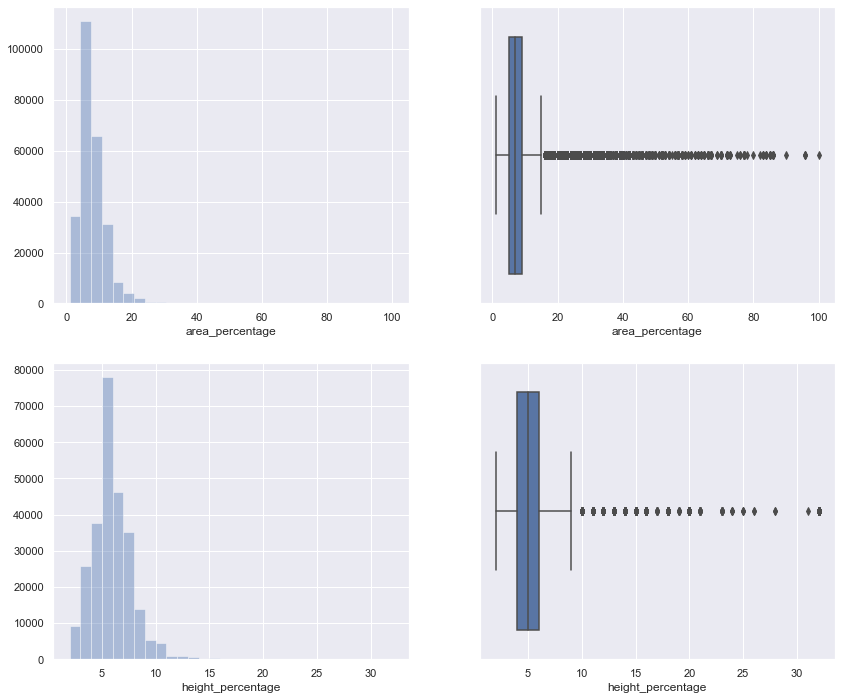

In [30]:
#area_percentage and height_percentage combined into one list 

area_and_height_perc = ["area_percentage", "height_percentage"]
f, axes = plt.subplots(2,2,figsize=(14,12))

#Plotting a histogram and a boxplot to visualise area_percentage and height_percentage
for i in range(2):
    sns.distplot(df[area_and_height_perc[i]], bins = 30, kde=False, ax = axes[i, 0])
    sns.boxplot(df[area_and_height_perc[i]], ax = axes[i, 1])

The height_percentage plot matches the plot for count_floors_pre_eq, which makes sense as the height of the building will have a strong correlation to the number of floors it has.

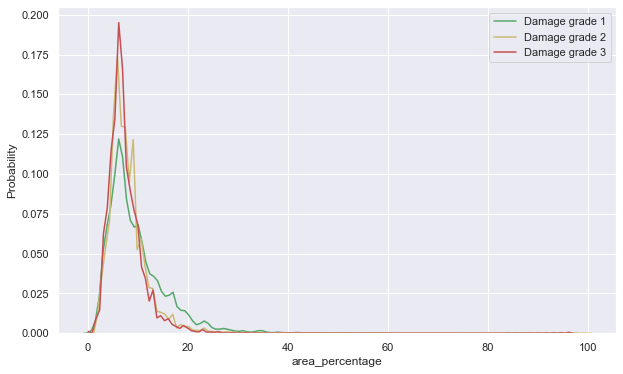

In [31]:
#Plotting the Probability Distribution Curve to visualise the probability a certain building falling under 
#Damage grade 1,2 and 3.

plt.figure(figsize=(10,6))
sns.distplot(df[df["damage_grade"]==1]["area_percentage"], hist = False, color = 'g', label="Damage grade 1")
sns.distplot(df[df["damage_grade"]==2]["area_percentage"], hist = False, color = 'y', label="Damage grade 2")
sns.distplot(df[df["damage_grade"]==3]["area_percentage"], hist = False, color = 'r', label="Damage grade 3")
plt.ylabel('Probability')
plt.show()

The distribution of area percentage for each damage grade are quite similar. We can see from this graph that the building with a lower area_percentage has a higher probability of falling under the damage_grade level 3. Therefore, area_percentage might be a fairly decent variable to use to predict the classification of each building into the appropriate damage grade level.

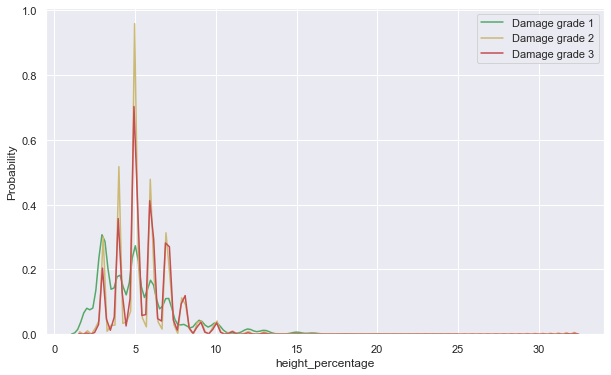

In [32]:
#Plotting the Probability Distribution Curve to visualise the probability a certain building falling under 
#Damage grade 1,2 and 3.

plt.figure(figsize=(10,6))
sns.distplot(df[df["damage_grade"]==1]["height_percentage"], hist = False, color = 'g', label="Damage grade 1")
sns.distplot(df[df["damage_grade"]==2]["height_percentage"], hist = False, color = 'y', label="Damage grade 2")
sns.distplot(df[df["damage_grade"]==3]["height_percentage"], hist = False, color = 'r', label="Damage grade 3")
plt.ylabel('Probability')
plt.show()

The distribution of the height_percentage in relation to the damage_grade can be seen in the above graph. It can be noted that the buildings with a lower height_percentage have a higher probability of having a lower damage grade.

Looking at 1) <strong>land_surface_condition</strong>, 2) <strong>foundation_type</strong>, 3) <strong>roof_type</strong>, 4) <strong>ground_floor_type</strong>, 5) <strong>other_floor_type</strong>, 6) <strong>position</strong>, 7) <strong>plan_configuration</strong>, 8) <strong>legal_ownership_status</strong>.

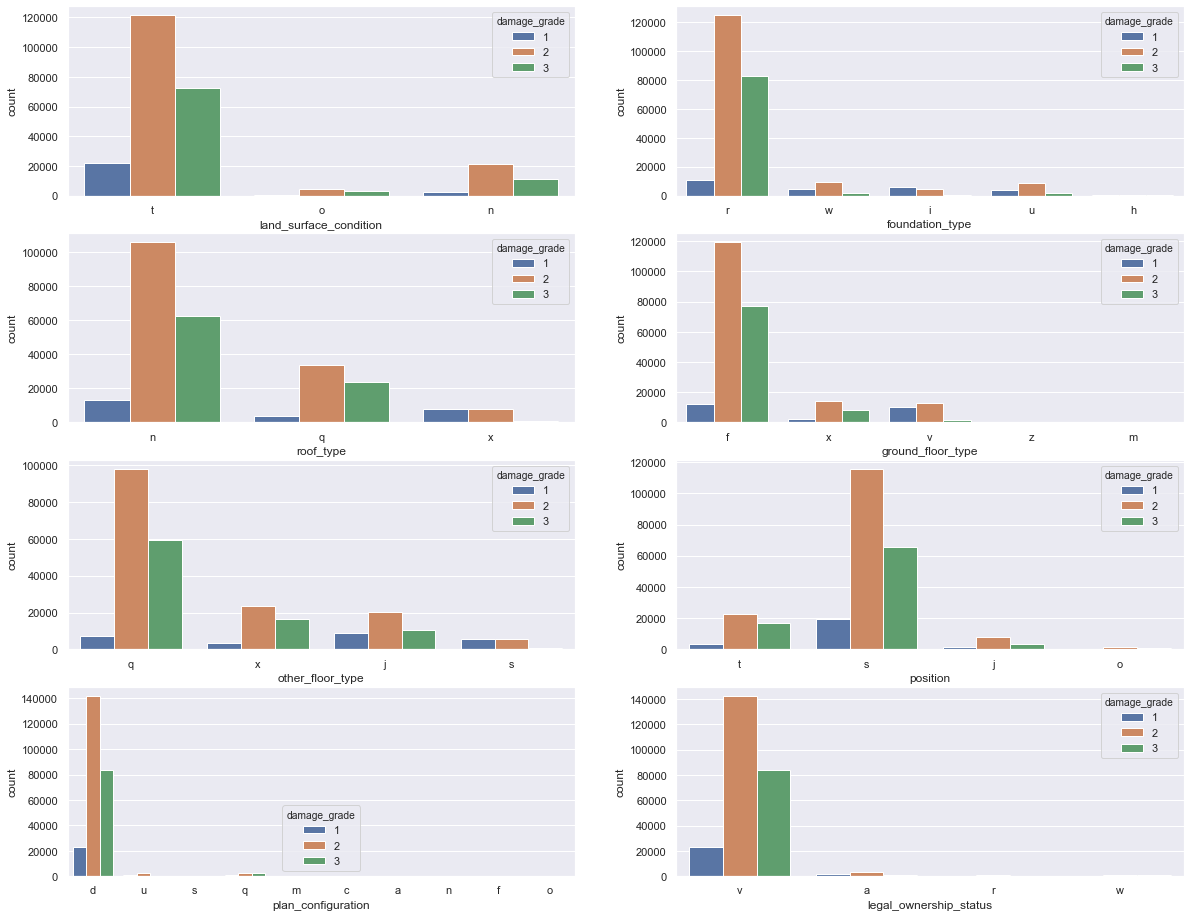

In [33]:
#Visualising the above mentioned variables using countplot
cat_var = ["land_surface_condition", "foundation_type", "roof_type", "ground_floor_type", "other_floor_type", "position", "plan_configuration", "legal_ownership_status"]
f, axes = plt.subplots(4, 2, figsize=(20,16))
for i in range(4):
    sns.countplot(x=cat_var[2*i], data=df, ax = axes[i, 0], hue = "damage_grade")
    sns.countplot(x=cat_var[2*i+1], data=df, ax = axes[i, 1], hue = "damage_grade")

Studying the <strong>superstructure</strong> material.

In [34]:
#Creating a list with all the has_superstructure_X variables
superstructure = []
for column in df.columns:
    if "has_superstructure" in column:
        superstructure.append(column)

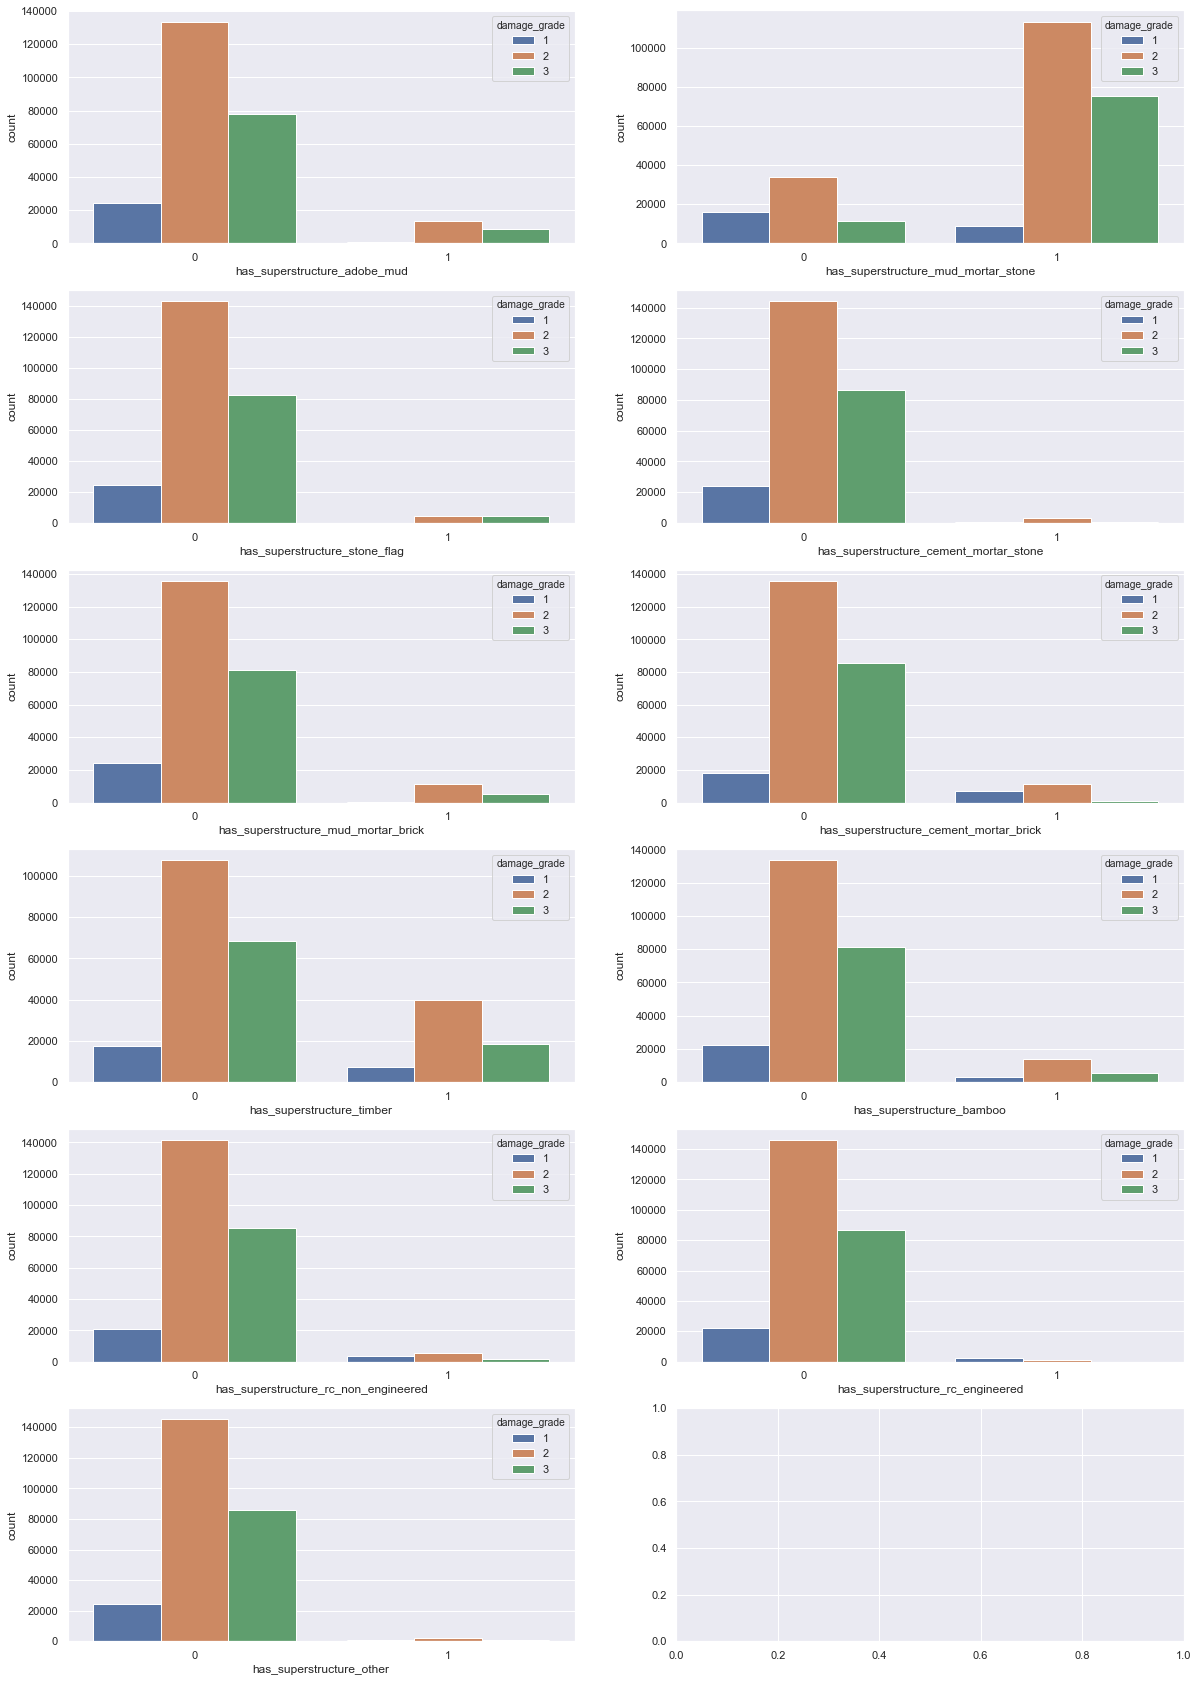

In [35]:
#Visualising all these has_superstructure_X variables using countplot
f, axes = plt.subplots(6, 2, figsize=(20,30))
for i in range(5):
    sns.countplot(x=superstructure[2*i], data=df, ax = axes[i, 0], hue = "damage_grade")
    sns.countplot(x=superstructure[2*i+1], data=df, ax = axes[i, 1], hue = "damage_grade")
sns.countplot(x=superstructure[10], data=df, ax=axes[5, 0], hue="damage_grade")

We observe that majority of the buildings have the superstructure made of mud_mortar_stone. We should not focus on the left countplot of each subplot (i.e the countplot for 0) because it comprises of a mixture all other superstructure types and thus its pattern is very similar in each subplot.

<strong>count_families</strong>: number of families that live in the building.

In [36]:
df["count_families"].value_counts()

1    224987
0     20679
2     11230
3      1794
4       386
5       101
6        21
7         7
9         4
8         2
Name: count_families, dtype: int64

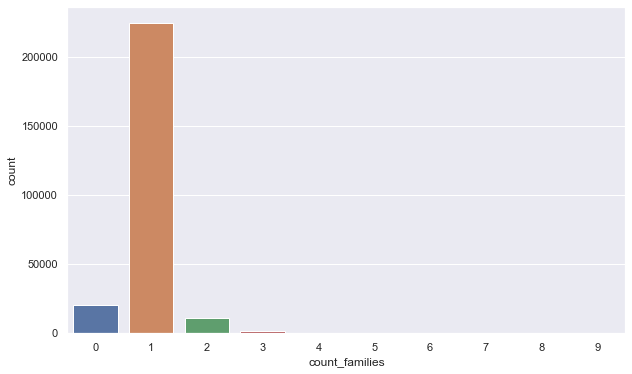

In [37]:
#Visualising the count_families using the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x="count_families", data=df)

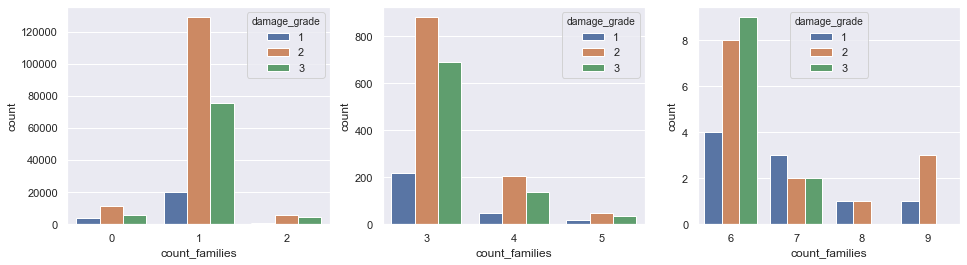

In [38]:
#Plotting the count_families in relation to damage_grade using countplot
zero_one_two_families = df[(df['count_families']==0) | (df['count_families']==1) | (df['count_families']==2)]
three_four_five_families = df[(df['count_families']==3) | (df['count_families']==4)| (df['count_families']==5)]
six_and_above_families = df[(df['count_families']==6)| (df['count_families']==7)| (df['count_families']==8)| (df['count_families']==9)]

f, axes = plt.subplots(1, 3, figsize=(16,4))
sns.countplot(x='count_families', data=zero_one_two_families, hue='damage_grade', ax = axes[0])
sns.countplot(x='count_families', data=three_four_five_families, hue='damage_grade', ax = axes[1])
sns.countplot(x='count_families', data=six_and_above_families, hue='damage_grade', ax = axes[2])

Now, we will look at whether the <strong>secondary use</strong> of the building affects its damage grade.

In [39]:
#Creating a list with all the has_secondary_use_X variables to facilitate exploration and visualisation
secondary_use = []
for column in df.columns:
    if "has_secondary_use" in column:
        secondary_use.append(column)

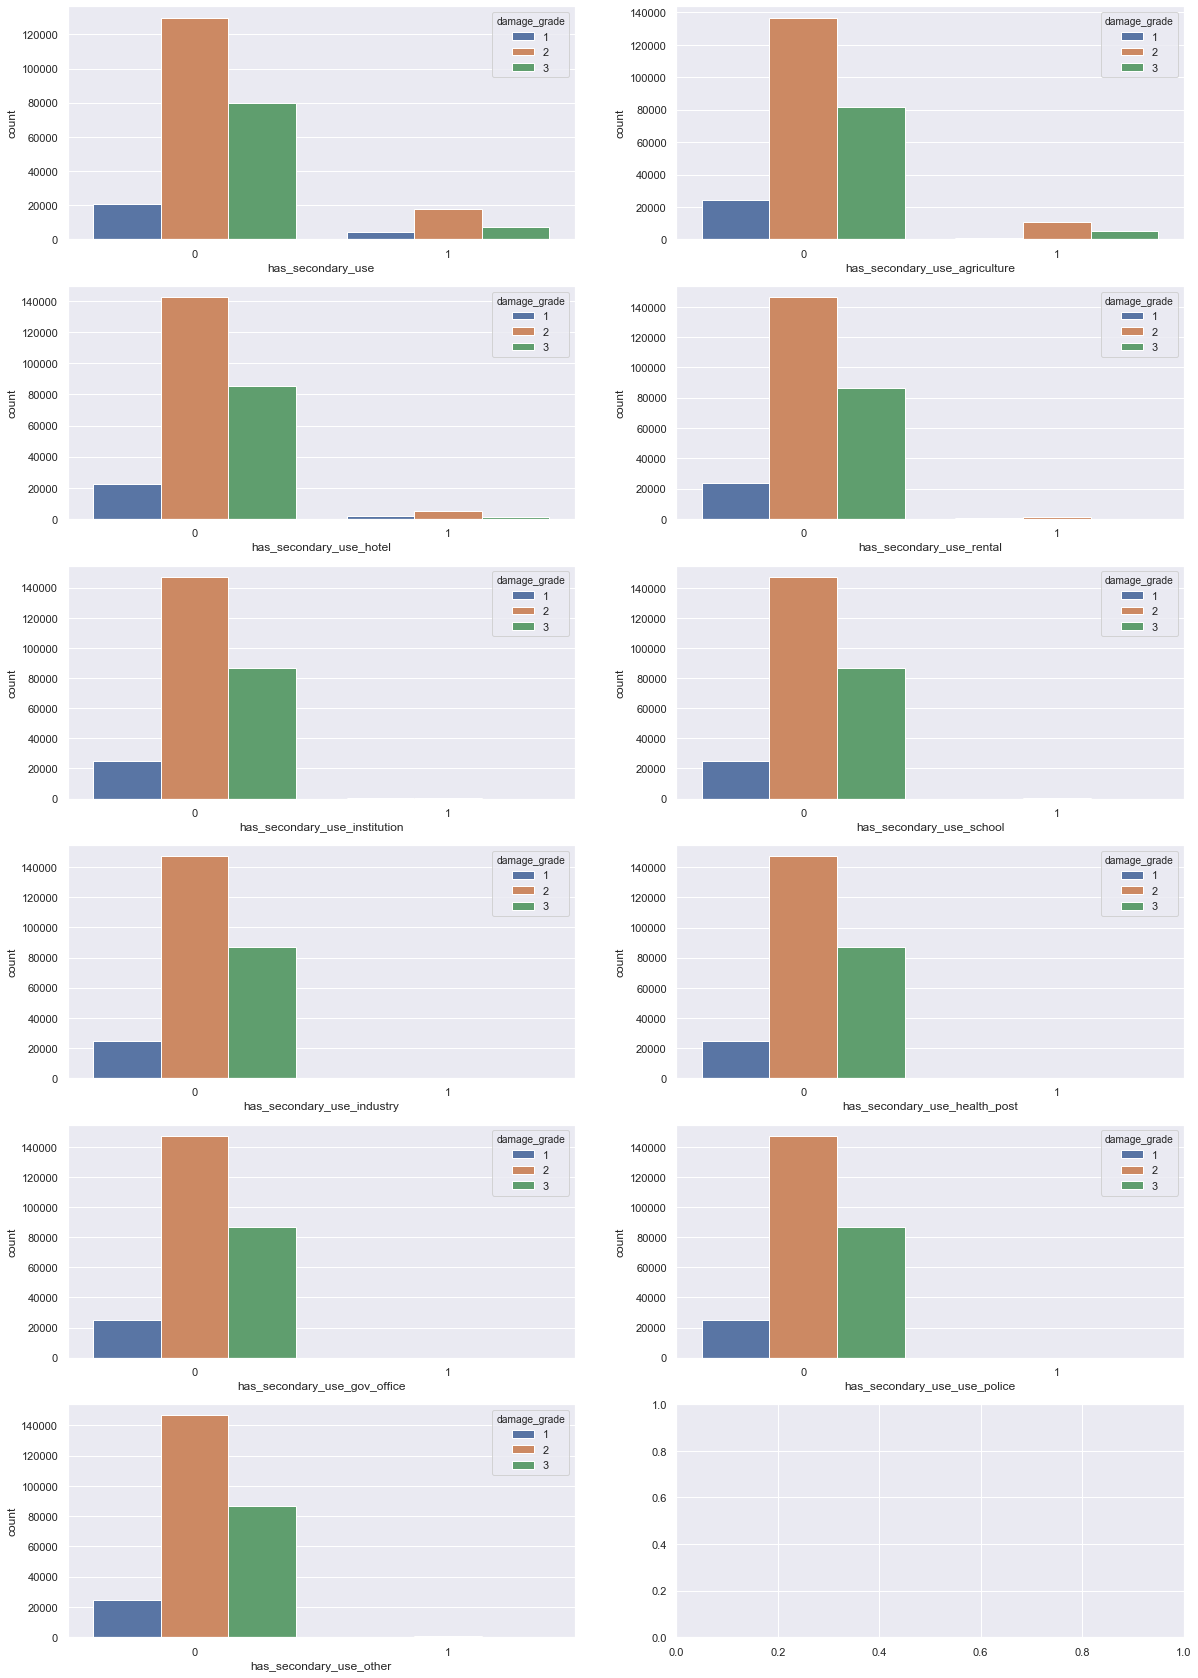

In [40]:
#Visualising the has_secondary_use_X variables in relation to the damage_grade using countplot
f, axes = plt.subplots(6, 2, figsize=(20,30))
for i in range(5):
    sns.countplot(x=secondary_use[2*i], data=df, ax = axes[i, 0], hue = "damage_grade")
    sns.countplot(x=secondary_use[2*i+1], data=df, ax = axes[i, 1], hue = "damage_grade")
sns.countplot(x=secondary_use[10], data=df, ax=axes[5, 0], hue="damage_grade")

Only a very small percentage of the buildings have a secondary use. Therefore, the secondary use may not be a good predictor for damage grade due to the lack of data points.

### Further Cleaning of Data

In [41]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [42]:
#Checking that each building has a unique building_id 
df['building_id'].nunique()

259211

The building_id does not have much meaning and is quite redundant in helping us predict damage_grade. As since the number of rows and the number of unique value in the building_id is equal, therefore we can conclude that each building has its own unique id.Therefore, we can conclude that there is not much meaning to building_id.

In [43]:
df = df.drop("building_id", axis=1)

In [44]:
#Removing the geo_level_2_id and geo_level_3_id 
df = df.drop(columns=["geo_level_2_id", "geo_level_3_id"])

The geo_level_2_id and geo_level_3_id columns contain numbers related to the geographic subregion that the buildings belong to. We should not treat them as numerical data as higher or lower values may not have any meaning. Furthermore, there are way too many different values for the two columns and they, to a certain extent, contain repeated information from geo_level_1_id. Therefore, we remove these 2 columns.

We keep geo_level_1_id and convert them into one-hot encoding as the region where buildings are located could be a important variable in determining its damage_grade.

### One-Hot Encoding

In [45]:
#Doing One-Hot Encoding for geo_level_1_id
geo_1 = pd.get_dummies(df["geo_level_1_id"])

In [46]:
#Dropping geo_level_1_id from df
df = df.drop(columns=["geo_level_1_id"])

In [47]:
#Concatenating the two dataframes
df = pd.concat([df, geo_1], axis=1)

Now, we will look at meaningful variables that are categorical and convert them into a one-hot encoding.

In [48]:
#Viewing the columns that are of the data type-'object'
df.select_dtypes(['object']).columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

In [49]:
#One-Hot Encoding for the columns that are of the data type-'object'
dummies = pd.get_dummies(df[['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status']], drop_first=True)

In [50]:
dummies.head()

,land_surface_condition_o,land_surface_condition_t,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_q,roof_type_x,ground_floor_type_m,ground_floor_type_v,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [51]:
#Concatenating the 2 Dataframes
df = pd.concat([df, dummies], axis=1)

In [52]:
#Dropping the variables that have not been one-hot encoded and are of the 'object' data type
df = df.drop(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'], axis=1)

In [53]:
y = df['damage_grade']
X = df.drop("damage_grade", axis=1)

### Balancing of Classes - using SMOTE

In [54]:
df['damage_grade'].value_counts()

2    147437
3     86829
1     24945
Name: damage_grade, dtype: int64

In [55]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [56]:
seed = 100

# SMOTE number of neighbors
k=1

In [57]:
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)

In [58]:
#damage_grade classes 1 and 3 have been balanced to the same level as class 2
pd.DataFrame(y_res, columns=['damage_grade'])['damage_grade'].value_counts()

3    147437
2    147437
1    147437
Name: damage_grade, dtype: int64

In [59]:
from collections import Counter

print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({2: 147437, 3: 86829, 1: 24945})
Resampled dataset shape Counter({3: 147437, 2: 147437, 1: 147437})


## Random Forest Classifier

### 1st Try - Before Tuning Parameters

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

##### Preparing the Dataset

In [58]:
#Splitting the data randomly into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2)

In [59]:
#FEATURE SCALING - to scale the data to ensure a suitable range compatible with the model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#fit to data then transform
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)


##### Training, Fitting and Predicting the Model 

In [60]:
#TRAINING THE RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier() #All the parameters are of its default value 

#FEW IMPORTANT PARAMETERS OF RANDOM FOREST CLASSIFIER:

#n_estimators --> no of decision trees in a forest - a forest is a collection of decision trees
              
#bootstrap --> whether bootstrap samples are used when building trees.
#If False then, the whole dataset is used to build each tree which is not 
#what we want, as then the Trees will be identical to each other

#random_state --> Controls both the randomness of the bootstrapping of the
#samples when buiding trees if bootstrap = True, AND the sampling of the 
#features to consider when looking for the best split at each node.

# There are 3 instances:
# 1. None --> default - use global random state numpy.random
# 2. int --> most popular seeded values are 0 and 42
# 3. numpy.random.RandomState instance

#FITTING THE ALGORITHM
classifier.fit(X_train, y_train)

#PREDICTING THE DAMAGE GRADE ON THE TEST DATA
y_pred = classifier.predict(X_test)

##### Obtaining the Evaluation Matrics

In [61]:
#The Metrics used to evaluate classifiation problems are:
# 1. Accuracy
# 2. Confusion Matrix
# 3. Precision Recall
# 4. F1 Values

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("\n")

print("CLassification Report:")
print(classification_report(y_test, y_pred))
print("\n")

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))
print("\n")

print("f1_score: ")
print(f1_score(y_test, y_pred, average='micro'))

Confusion Matrix:
[[27591  1507   275]
 [ 2814 19894  6882]
 [  760  5961 22779]]


CLassification Report:
              precision    recall  f1-score   support

           1       0.89      0.94      0.91     29373
           2       0.73      0.67      0.70     29590
           3       0.76      0.77      0.77     29500

    accuracy                           0.79     88463
   macro avg       0.79      0.79      0.79     88463
weighted avg       0.79      0.79      0.79     88463



Accuracy Score:
0.7942755728383618


f1_score: 
0.7942755728383619


The Random Forest is a very powerful tool for Classification as they limit Overfitting by finding the aggregate of all the decision trees. They are able to limit Overfitting without increasing the error due to bias to a large extent. Random Forest reduces Variance by using Random Subsets of Features and by Training on different samples of data. 

However, due to the default value of some parameters being set, such as max_depth, there might be a chance of Overfitting the model. The default value of max_depth would be 'None', which means that the nodes are expanded until all the leaves are pure, and cannot be expanded further, or the nodes are expanded until all leaves contain less than min_samples_split samples, which in this case will be 2 as the default value for min_samples_split is 2. Therefore, in order to prevent Overfitting, it is important for us to tune our parameters.

## Tuning Parameters

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]

# Minimum number of samples required to split a node
min_samples_leaf = [1,2,4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)

{'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'n_estimators': [20, 65, 110, 155, 200]}


In [63]:
# Use the random grid to search for best hyperparameters
forest = RandomForestClassifier()

# Random search of parameters, using k fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='f1_micro')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 65.9min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [64]:
# best random model 
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=65, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
# best combination of parameters of random search
rf_random.best_params_

{'n_estimators': 110,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 65}

### 2nd Try - With the optimal values for the Parameters

##### Training, Fitting and Predicting the Model with optimal values for the Parameters

In [66]:
rfc_new = RandomForestClassifier(n_estimators=110, min_samples_leaf=1, max_features='auto', max_depth=65)

In [67]:
rfc_new.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=65, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
predictions_new = rfc_new.predict(X_test)

##### Obtaining the Evaluation Metrics for the Model with fine tuned parameters

In [69]:
#The Metrics used to evaluate classifiation problems are:
# 1. Accuracy
# 2. Confusion Matrix
# 3. Precision Recall
# 4. F1 Values

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_new))
print("\n")

print("CLassification Report:")
print(classification_report(y_test, predictions_new))
print("\n")

print("Accuracy Score:")
print(accuracy_score(y_test, predictions_new))
print("\n")

print("f1_score: ")
print(f1_score(y_test, predictions_new, average='micro'))

Confusion Matrix:
[[27621  1484   268]
 [ 2819 19911  6860]
 [  771  5947 22782]]


CLassification Report:
              precision    recall  f1-score   support

           1       0.88      0.94      0.91     29373
           2       0.73      0.67      0.70     29590
           3       0.76      0.77      0.77     29500

    accuracy                           0.79     88463
   macro avg       0.79      0.80      0.79     88463
weighted avg       0.79      0.79      0.79     88463



Accuracy Score:
0.7948407808914462


f1_score: 
0.7948407808914462


## Determining Feature Importances

In [70]:
from sklearn.feature_selection import SelectFromModel

In [71]:
#Finding the Importance of each Feature
rfc_new.feature_importances_

array([2.13897262e-02, 1.40982894e-01, 1.47957693e-01, 7.18712029e-02,
       1.01801118e-02, 4.42202791e-02, 7.54847922e-03, 3.95812353e-03,
       9.39669164e-03, 1.09947717e-02, 1.59963799e-02, 8.44686491e-03,
       5.99267100e-03, 2.80958843e-03, 3.15847619e-03, 2.47956702e-02,
       6.95836077e-03, 4.48369163e-03, 3.06103234e-03, 8.92834289e-04,
       1.92661961e-04, 7.43471553e-05, 2.38431797e-04, 5.37701758e-05,
       2.18673644e-05, 1.87151879e-05, 9.90373645e-04, 3.64789565e-03,
       3.11229899e-03, 1.13288046e-03, 3.75912417e-03, 7.14466293e-03,
       3.19134105e-03, 9.13342002e-03, 8.76398785e-03, 1.23941483e-02,
       4.00364736e-03, 9.23085701e-03, 4.93311217e-03, 2.40932418e-03,
       1.31586857e-02, 1.88244596e-03, 2.08162510e-03, 3.30904514e-03,
       4.33939123e-02, 5.54084018e-03, 4.40805994e-04, 8.09746897e-03,
       1.10276062e-02, 4.62217029e-03, 1.35747202e-03, 1.49328289e-03,
       4.16455959e-03, 2.69872687e-02, 8.72619616e-03, 5.17479014e-04,
      

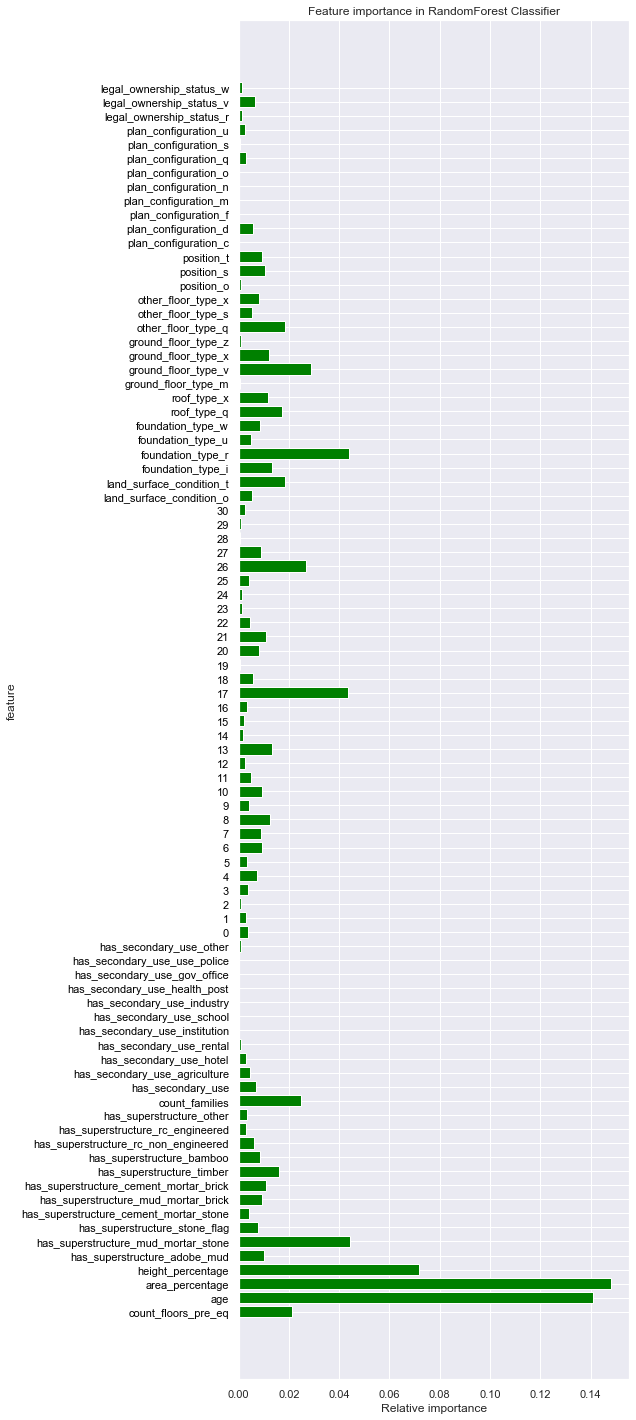

<Figure size 1440x5760 with 0 Axes>

In [72]:
#modelname.feature_importance_
feature_imp = rfc_new.feature_importances_

#plot
fig, ax = plt.subplots()

#the width of the bars
width = 5

#the x locations for the groups
ind = np.arange(len(feature_imp))
ax.barh(ind,feature_imp, color="green") 
col_ind = np.arange(len(X.columns)) #added
ax.set_yticks(col_ind) # added

#ax.set_yticks(ind + width/10) 
ax.set_yticklabels(list((X.columns)), minor=False, color="black") 

plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(20,80))
fig.set_size_inches(7, 25, forward=True)

In [73]:
feature_importances = pd.DataFrame(rfc_new.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
area_percentage,0.147958
age,0.140983
height_percentage,0.071871
has_superstructure_mud_mortar_stone,0.044220
foundation_type_r,0.043970
...,...
plan_configuration_n,0.000050
plan_configuration_m,0.000047
has_secondary_use_gov_office,0.000022
has_secondary_use_use_police,0.000019


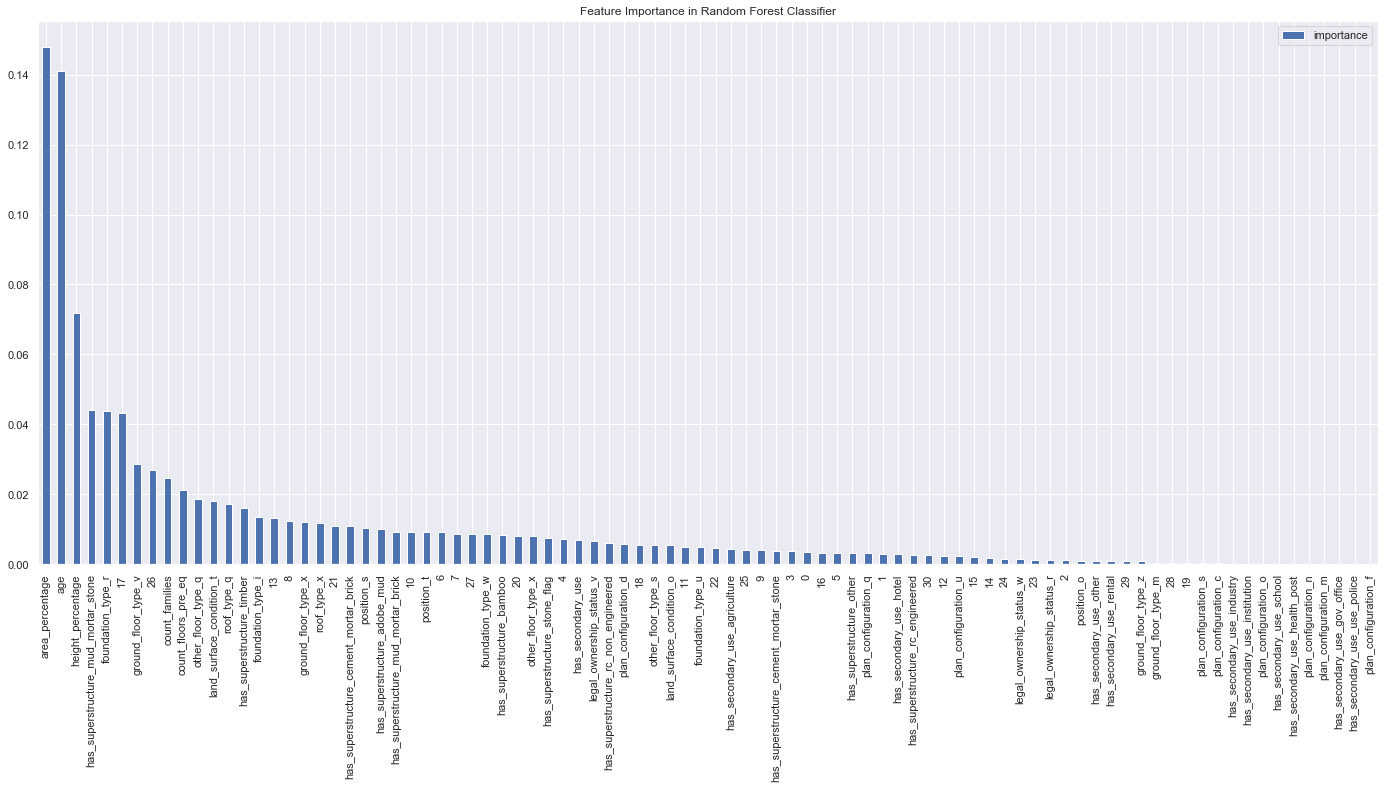

In [74]:
feature_importances.plot(kind="bar", figsize=(24,10), title="Feature Importance in Random Forest Classifier")

In [75]:
#Select the most important features - features that have more than 5%
sfm = SelectFromModel(rfc_new, threshold=0.05)
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=65,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=110, n_jobs=None,
                                                 oob_score=False,
                                                 r

In [76]:
print("Important Features- Features that have Importance of more than 5%: \n")
for feature_list_index in sfm.get_support(indices=True):
    print(X.columns[feature_list_index])

Important Features- Features that have Importance of more than 5%: 

age
area_percentage
height_percentage
has_superstructure_mud_mortar_stone


In [77]:
# Transform data into a new dataset with only the important features
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [78]:
#New Random Forest Classifier with only important features

rfc_important = RandomForestClassifier()
rfc_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
#Predicting using the new model with only the Important Features
important_predictions = rfc_important.predict(X_important_test)

In [80]:
accuracy_score(y_test, important_predictions)

0.5508743768581215

In [81]:
print("The accuracy from using all the features is:", rfc_new.score(X_test, y_test))
print("The accuracy from using only the 4 most important features is:", rfc_important.score(X_important_test, y_test))

The accuracy from using all the features is: 0.7948407808914462
The accuracy from using only the 4 most important features is: 0.5508743768581215


From this comparison, we can see that by dropping from utilising all 88 variables to only the most important 4 variables led us to a 24% drop in our prediction accuracy.

## Neural Networks

In [82]:
from sklearn.preprocessing import MinMaxScaler

##### Preparing the Dataset

In [83]:
#One_hot Encoding the damage_grade as the Neural Network can only take in Binary Numbers
y_train_values = pd.get_dummies(y_train)
y_test_values = pd.get_dummies(y_test)

In [87]:
#Converting DataFrame into a NumpyArray as Neural Networks takes in Numpy Arrays
X_train_values = X_train
X_test_values = X_test
y_train_values = y_train_values.values
y_test_values = y_test_values.values

In [88]:
#Normalise the X values
scaler = MinMaxScaler()

In [89]:
X_train_values = scaler.fit_transform(X_train_values)

In [90]:
X_test_values = scaler.transform(X_test_values)

In [171]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [172]:
#Creating a Neural Network
model = Sequential()

model.add(Dense(88, activation="relu"))

model.add(Dense(44, activation='relu'))

model.add(Dense(22, activation='relu'))

model.add(Dense(11, activation='relu'))

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

##### Fitting  the Model

In [173]:
#Fitting the Model
model.fit(X_train_values, y_train_values, epochs=200, batch_size=256, validation_data=(X_test_values, y_test_values))

Train on 353848 samples, validate on 88463 samples
Epoch 1/200
353848/353848 [==============================] - 3s 8us/sample - loss: 0.6750 - accuracy: 0.6888 - val_loss: 0.6401 - val_accuracy: 0.7038
Epoch 2/200
353848/353848 [==============================] - 2s 7us/sample - loss: 0.6248 - accuracy: 0.7138 - val_loss: 0.6220 - val_accuracy: 0.7153
Epoch 3/200
353848/353848 [==============================] - 3s 8us/sample - loss: 0.6134 - accuracy: 0.7182 - val_loss: 0.6144 - val_accuracy: 0.7203
Epoch 4/200
353848/353848 [==============================] - 3s 7us/sample - loss: 0.6068 - accuracy: 0.7219 - val_loss: 0.6120 - val_accuracy: 0.7197
Epoch 5/200
353848/353848 [==============================] - 3s 7us/sample - loss: 0.6011 - accuracy: 0.7238 - val_loss: 0.6055 - val_accuracy: 0.7234
Epoch 6/200
353848/353848 [==============================] - 2s 7us/sample - loss: 0.5969 - accuracy: 0.7261 - val_loss: 0.6036 - val_accuracy: 0.7247
Epoch 7/200
353848/353848 [================

Epoch 108/200
353848/353848 [==============================] - 2s 6us/sample - loss: 0.5331 - accuracy: 0.7600 - val_loss: 0.5787 - val_accuracy: 0.7436
Epoch 109/200
353848/353848 [==============================] - 2s 7us/sample - loss: 0.5328 - accuracy: 0.7598 - val_loss: 0.5783 - val_accuracy: 0.7428
Epoch 110/200
353848/353848 [==============================] - 2s 7us/sample - loss: 0.5328 - accuracy: 0.7602 - val_loss: 0.5833 - val_accuracy: 0.7428
Epoch 111/200
353848/353848 [==============================] - 2s 7us/sample - loss: 0.5322 - accuracy: 0.7607 - val_loss: 0.5787 - val_accuracy: 0.7455
Epoch 112/200
353848/353848 [==============================] - 2s 7us/sample - loss: 0.5320 - accuracy: 0.7609 - val_loss: 0.5800 - val_accuracy: 0.7438
Epoch 113/200
353848/353848 [==============================] - 2s 7us/sample - loss: 0.5320 - accuracy: 0.7605 - val_loss: 0.5816 - val_accuracy: 0.7438
Epoch 114/200
353848/353848 [==============================] - 2s 7us/sample - los

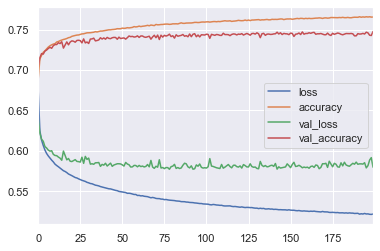

In [174]:
#Plotting the Losses and the Validation Loss
losses = pd.DataFrame(model.history.history)
losses.plot()

In [175]:
#Evaluating the score of the model
score = model.evaluate(X_train_values, y_train_values, batch_size = 256)

353848/353848 [==============================] - 1s 3us/sample - loss: 0.5161 - accuracy: 0.7688


##### Predictions

In [224]:
predictions = model.predict_classes(X_test_values)

In [225]:
predictions = pd.DataFrame(predictions)

In [226]:
predictions.columns = ["predictions"]

In [227]:
#One-Hot Encoding to compare the original y_test 
predictions = pd.get_dummies(predictions['predictions'])

In [228]:
#To view the predictions
predictions.values

array([[0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [229]:
y_test_values

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [230]:
#Obtain the f1_score of the Neural Network
f1_score(y_test_values, predictions, average='micro')

0.7475893876535954

## Comparing Neural Networks and Random Forests

In [231]:
#Comparing the f1-score and Accuracy Score
print("f1 score for Random Forest:", f1_score(y_test, predictions_new, average='micro'))
print("f1 score for Neural Network:", f1_score(y_test_values, predictions, average='micro'))

f1 score for Random Forest: 0.7948407808914462
f1 score for Neural Network: 0.7475893876535954


In [490]:
import random
#Predicting the damage grade of a randomly chosen building
random_ind = random.randint(0,len(df))

house = df.iloc[random_ind]
house_data = sc.transform(house.drop("damage_grade").values.reshape(1, -1))
house_data_nn = scaler.transform(house_data)

In [491]:
print("The actual damage grade:", house["damage_grade"])
print("The predicted damage grade by Random Forest:", rfc_new.predict(house_data_rf)[0])
print("The predicted damage grade by Neural Network:", model.predict_classes(house_data_nn)[0]+1)

The actual damage grade: 2
The predicted damage grade by Random Forest: 2
The predicted damage grade by Neural Network: 2


## Conclusion of our models

With the better parameter tuning of our Random Forest model, we are able to obtain a higher f1 score on our Random Forest model.

Though, when picking out a random building for each model to predict, both can have mistakes in their predictions at times.

## Have we achieved our objectives?

These were the problems that we posed to ourselves before starting our Exploratory Analysis and their corresponding solutions:

   1. What are the 3 most important features in predicting the level of damage done to the building?
   
       - Through Random Forests and Feature Importance we have found that the 3 most important features in determining the level of damage done to the buildings are:
           1. area_percentage - 15% importance --> the lower the area_percentage, the more damage done
           2. age - 14% importance --> the older the building, the more damage done
           3. height_percentage - 7% importance --> the taller the building, the more damage done
       
       
       
   2. How then, do we allocate the Government's Budget to help different houses based on their predicted level of destruction.
   
       - In the future to allocate the budget more efficiently, the most important factor that determines how much of the budget should be allocated to the buildings depends on the predicted damage_grade, the higher the level of damage - the more money allocated to them. 
       
            The Government can then allocate 50% of the budget allocated for reinforcement to those buildings whose damage_grade has been predicted under the damage level 3, 30% to those under damage level 2 and the remaining 20% to those in damage level 1. Within the respective allocations, the government can then look to prioritise its funds towards older buildings, building with lower area percentages and buildings which are taller.
        
   

## Resources
https://www.kaggle.com/emanueleamcappella/random-forest-hyperparameters-tuning

https://deepai.org/machine-learning-glossary-and-terms/random-forest

https://towardsdatascience.com/random-forest-3a55c3aca46d

https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://towardsdatascience.com/random-forests-and-decision-trees-from-scratch-in-python-3e4fa5ae4249

https://www.knowledgehut.com/blog/data-science/bagging-and-random-forest-in-machine-learning

https://www.knowledgehut.com/blog/category/data-science

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.set_yticks.html

https://towardsdatascience.com/why-random-forest-is-my-favorite-machine-learning-model-b97651fa3706

https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

https://medium.com/machine-learning-101/chapter-5-random-forest-classifier-56dc7425c3e1

https://towardsdatascience.com/introduction-to-artificial-neural-networks-ann-1aea15775ef9

https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

https://pbpython.com/pandas-pivot-table-explained.html

https://medium.com/@garg.mohit851/random-forest-visualization-3f76cdf6456f

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

https://pbpython.com/pandas-crosstab.html

https://deepai.org/machine-learning-glossary-and-terms/f-score

## Work Allocation

Exploratory Analysis and Visualisation - Amadeus

Data Cleaning - Qi Wei

Random Forests - Sankeerthana, Noah

Tuning Parameters - Noah

Feature Importance - Qi Wei, Sankeerthana

Neural Networks - Amadeus 